In [69]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

# https://pyimagesearch.com/2015/12/07/local-binary-patterns-with-python-opencv/
# https://www.geeksforgeeks.org/create-local-binary-pattern-of-an-image-using-opencv-python/
# https://docs.opencv.org/4.x/dc/ddd/group__line__descriptor.html

In [221]:
def plot_image(image: np.ndarray, 
               title='{Title}', 
               figsize=(15, 10),
               cmap='gray',
               hide_axis=True):
    
    plt.figure(figsize=figsize)
    plt.title(title)
    plt.imshow(image, cmap=cmap)
    if hide_axis:
        plt.axis('off')
    plt.show()

In [222]:
def read_img(file_path: str, grayscale: bool = True) -> np.ndarray:
    flags = cv2.IMREAD_GRAYSCALE if grayscale else None
    image = cv2.imread(file_path, flags)

    # Check if image is loaded properly
    if image is None:
        raise ValueError("Image not loaded properly. Check the path and file format.")
    return image

# Extract Pattern

In [332]:
scheme_image_path = 'images/scheme_empty.jpg'
scheme_example_image_path = 'images/scheme_example.png'
tanjiro_image_path = 'images/Tanjiro.png'

## Raw Scheme

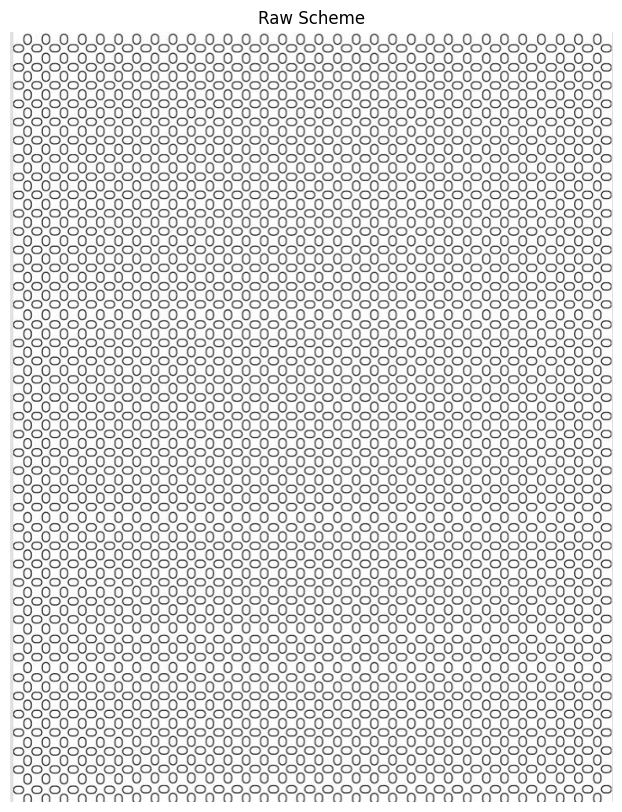

In [333]:
scheme_image = read_img(scheme_image_path)
plot_image(scheme_image, 'Raw Scheme')

In [334]:
scheme_image.shape

(914, 715)

## Binary Scheme

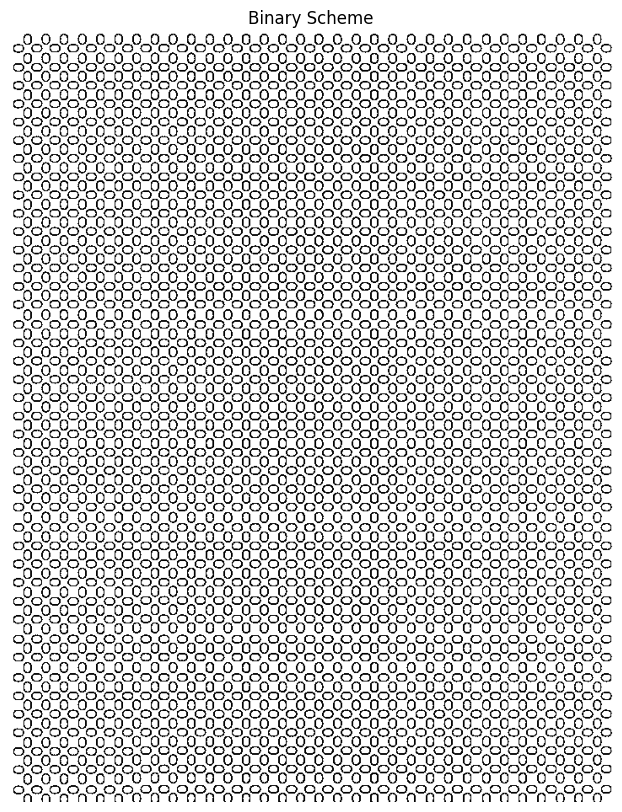

In [335]:
_, binary_image = cv2.threshold(scheme_image, 0, 255, cv2.THRESH_OTSU)
plot_image(binary_image, 'Binary Scheme')

## Extract Pattern

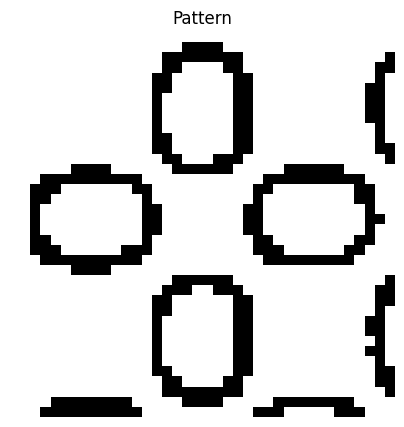

In [347]:
# Высота
n_row_from = 1
n_row_to = 38 + n_row_from # y axis

# Ширина
n_col_from = 2 # x axis
n_col_to = 38 + n_col_from

pattern = binary_image[
    n_row_from:n_row_to,
    n_col_from:n_col_to
].copy()


fill_value = 0

# pattern[0, :] = fill_value # first row, all cols
# pattern[-1, :] = fill_value # last row, all cols

# pattern[:, 0] = fill_value # all rows, first col
# pattern[:, -1] = fill_value # all rows, last col


plot_image(pattern, 'Pattern', figsize=(5, 5))

## Find contours

In [477]:
rendered_contours

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255,   0],
       ...,
       [255, 255, 255, ..., 255, 255,   0],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

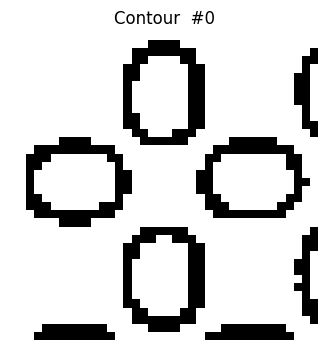

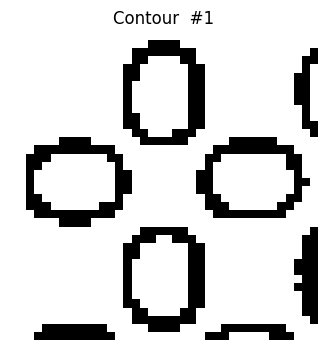

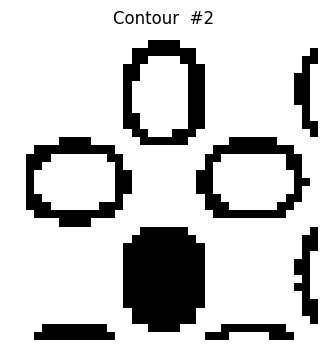

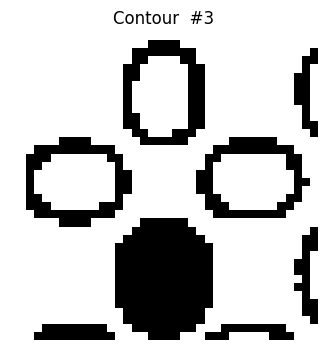

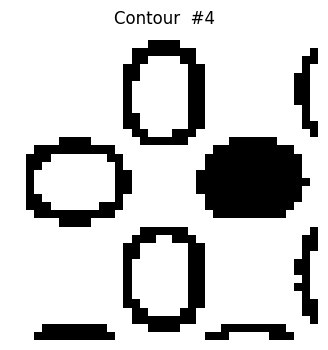

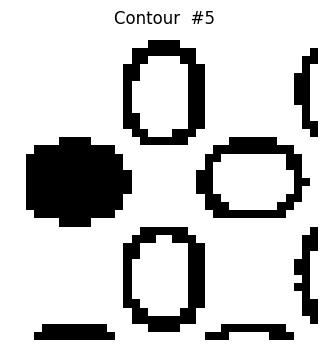

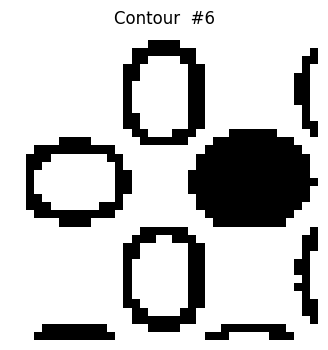

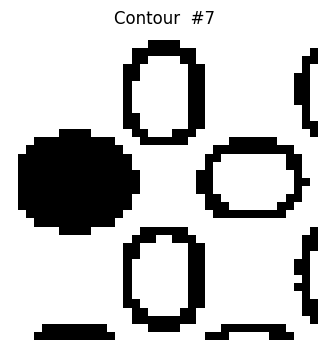

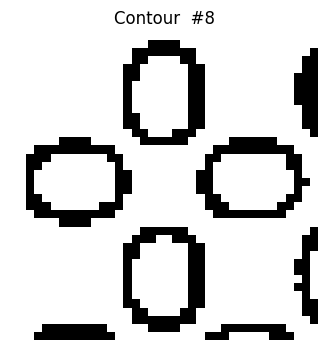

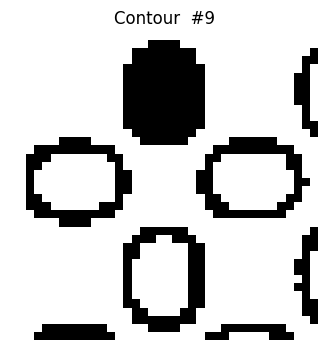

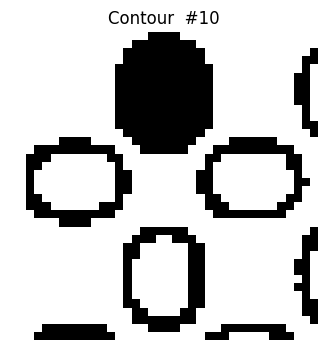

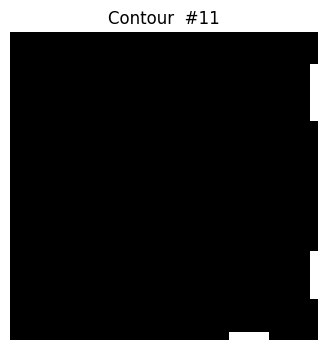

In [488]:
contours = cv2.findContours(pattern.copy(), 
                            cv2.RETR_LIST, 
                            cv2.CHAIN_APPROX_SIMPLE)

contours = contours[0] if len(contours) == 2 else contours[1]


# cnt = contours[2]
# contour_color = (123, 123, 123)
contour_color = 0 #(123, 123, 123)

# rendered_contours = pattern.copy()

for i, c in enumerate(contours):
    rendered_contours = cv2.drawContours(pattern.copy(), [c], 0, contour_color , -1)
    plot_image(rendered_contours, f'Contour  #{i}', figsize=(4,4))

## Get proportions

### Bead shape

In [569]:
pattern

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255,   0],
       ...,
       [255, 255, 255, ..., 255, 255,   0],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [560]:
selected_contour = contours[3]
bead = selected_contour.squeeze()
bead_x =  bead[:,0]
bead_y =  bead[:,1]

In [508]:
x_min = bead_x.min()
x_max = bead_x.max()

y_min = bead_y.min()
y_max = bead_y.max()

In [512]:
x_max - x_min, y_max - y_min

(np.int32(11), np.int32(14))

In [520]:
ellipse_prop = (y_max - y_min) / (x_max - x_min)
ellipse_prop

np.float64(1.2727272727272727)

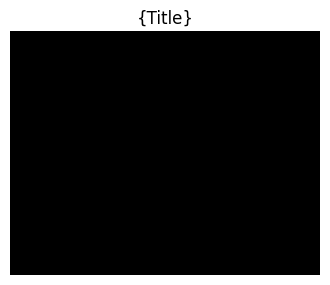

In [573]:
parray = np.full((x_max - x_min, y_max - y_min), fill_value=(9), dtype=np.uint8)
parray

plot_image(parray, figsize=(4,4))

In [574]:
parray

array([[9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
       [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
       [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
       [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
       [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
       [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
       [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
       [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
       [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
       [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9],
       [9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]], dtype=uint8)

In [575]:
rendered_contours = cv2.drawContours(parray.copy(), [selected_contour], 0, contour_color , 1)

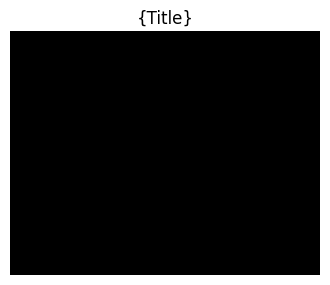

In [576]:
plot_image(rendered_contours, figsize=(4,4))

## Draw Elliptic bead

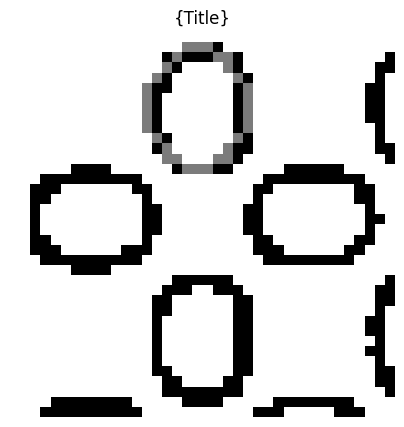

In [536]:
c_x = pattern.shape[0] // 2 - 1
c_y = pattern.shape[0] // 4 - 2
center = (c_x, c_y)

scale = 5
size = 2
e_x = int(size * scale // 2)
e_y = int(size * ellipse_prop * scale // 2)

axes = (10, 5)
axes = (e_x, e_y)


ellipse = cv2.ellipse(
    img=pattern.copy(), 
    center=center, 
    axes=axes, 
    angle=0, 
    startAngle=0, 
    endAngle=360, 
    color=(123, 123, 123)
)

plot_image(ellipse, figsize=(5,5))

In [527]:
e_x // 2, e_y // 2

(2, np.float64(3.0))